In [12]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from scipy import stats
import itertools

In [13]:
df = pd.read_csv("churndataset.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
df.shape

(3333, 20)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [17]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [18]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [19]:
df["Churn"] = df["Churn"].astype("int64")

In [20]:
print(df['Churn'].value_counts())
print()
print("Доля не оттока:", df['Churn'].value_counts()[0]/len(df))
print("Доля оттока:   ", df['Churn'].value_counts()[1]/len(df))

0    2850
1     483
Name: Churn, dtype: int64

Доля не оттока: 0.8550855085508551
Доля оттока:    0.14491449144914492


In [21]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [22]:
num_features = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge',
               'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls',
               'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge',
               'Customer service calls']

cat_features = ['State', 'Area code', 'International plan', 'Voice mail plan']


print('Количество числовых признаков:', len(num_features))
print('Количество категориальных признаков:', len(cat_features))

Количество числовых признаков: 15
Количество категориальных признаков: 4


Для начала посмотрим на корреляции между числовыми признаками. Метод corr() считает попарные корреляции для признаков и выдаст единицу, в случае линейной зависимости, ноль, в случае её отсутствия.

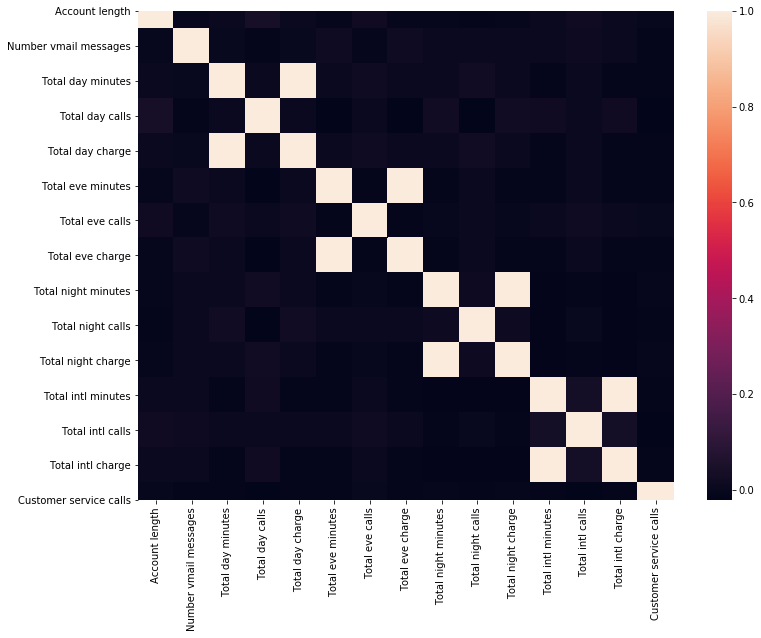

In [23]:
corrmat = df[num_features].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)

Кроме стоимости и минут разговора, все признаки друг от друга линейно не зависят. 
Разберёмся с линейно зависимыми признаками, ведь некоторые модели плохо работают на данных с такими признаками.

In [24]:
df[['Total day minutes', 'Total eve minutes', 'Total night minutes','Total intl minutes']].values / \
df[['Total day charge', 'Total eve charge', 'Total night charge','Total intl charge']].values

C:\Games\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([[ 5.88196139, 11.76400477, 22.22524977,  3.7037037 ],
       [ 5.88278122, 11.76293622, 22.21834061,  3.7027027 ],
       [ 5.88206863, 11.76699029, 22.21311475,  3.70820669],
       ...,
       [ 5.88158751, 11.76374745, 22.21064815,  3.7007874 ],
       [ 5.88170564, 11.76123803, 22.23642173,  3.7037037 ],
       [ 5.88205772, 11.76548673, 22.22836096,  3.7027027 ]])

Видим, что суммарная стоимость звонков равна суммарному времени разговоров, умноженная на коэффициент, поэтому удалим колонки с минутами.

In [25]:
df = df.drop(['Total day minutes', 'Total eve minutes', 'Total night minutes','Total intl minutes'], axis=1)
for f in ['Total day minutes', 'Total eve minutes', 'Total night minutes','Total intl minutes']:
    num_features.remove(f)

In [26]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,No,Yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,No,No,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,Yes,No,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,Yes,No,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


Теперь посмотрим на взаимосвязь числовых признаков с целевой меткой. В задаче бинарной классификации мы не можем использовать обычные методы рассчёта корреляции. Поэтому будем рассчитывать средние значения признаков при оттоке и при не оттоке клиентов. После чего вычтем одно из другого, получив среднюю разность признаков при разных метках. В качестве меры взаимосвязи с целевой меткой будем использовать значение p value, рассчитанное с помощью рангового критерия Манна-Уитни при проверке гипотезы:

Н0: Р(X>Y) = P(Y>X) - среднее значение признака в двух группах (отток, не отток) не отличается

H1: P(X>Y) != P(Y>X) - среднее значение признака в двух группах отличается

Критерий имеет ограничение по объёму выборки: n1, n2 > 10. Так как у нас достаточно большой набор данных, не вижу смысла проверять это ограничение.

In [27]:
# Получим списки индексов объектов с Churn = 1 и 0
labels_churn_ind = df[df['Churn'] == 1].index
labels_not_churn_ind = df[df['Churn'] == 0].index

In [28]:
# Рассчитаем средние значения признаков для оттока и не оттока, а также их разность
data_churn_mean = df.iloc[labels_churn_ind][num_features].mean()
data_not_churn_mean = df.iloc[labels_not_churn_ind][num_features].mean()
diff_mean = data_churn_mean - data_not_churn_mean

In [29]:
# Получим p value для каждого признака и положим в DataFramе вместе 
# со средними значениями признаков по целевым меткам и их разности.
p_values = []
for f in num_features:
    p_values.append(stats.mannwhitneyu(df.iloc[labels_churn_ind][f], df.iloc[labels_not_churn_ind][f])[1])

p_values = pd.DataFrame({'mean_diff': diff_mean,'churn': data_churn_mean,
                         'not_churn': data_not_churn_mean, 'p': p_values}, index = num_features).sort_values('p')

In [30]:
p_values

,mean_diff,churn,not_churn,p
Total day charge,5.395500,35.175921,29.780421,3.357527e-23
Customer service calls,0.779989,2.229814,1.449825,1.532012e-15
Number vmail messages,-3.488619,5.115942,8.604561,1.852441e-08
Total eve charge,1.136060,18.054969,16.918909,1.584183e-07
Total intl calls,-0.369421,4.163561,4.532982,7.969740e-06
Total intl charge,0.146141,2.889545,2.743404,2.219822e-04
Total night charge,0.229454,9.235528,9.006074,2.368575e-02
Total day calls,1.052246,101.335404,100.283158,6.441369e-02
Account length,1.870912,102.664596,100.793684,1.841986e-01
Total eve calls,0.522480,100.561077,100.038596,3.102497e-01


По полученной таблице мы можем отвергнуть нулевую гипотезу для признаков с p value меньше 0.05. Однако, не будем удалять признаки, для которых H0 отвергнуть не можем. Как минимум потому, что это может быть ошибка первого рода. И если это всё же данные, не влияющие на целевую метку, то можно будет попробовать алгоритмы, которые не сильно чувствительны к шумовым данным, или попробовать различные методы регуляризации.

Так же, для упрощения возможной модели, или для более понятной визуализации можно создать два новых признака - суммарное количество звонков за сутки и суммарная плата за сутки.

In [31]:
df['Total calls'] = (
    df['Total day calls']
    + df['Total eve calls']
    + df['Total night calls']
    + df['Total intl calls']
)

df['Total charge'] = (
    df['Total day charge']
    + df['Total eve charge']
    + df['Total night charge']
    + df['Total intl charge']
)

num_features.append('Total calls')
num_features.append('Total charge')

for f in ['Total day charge', 'Total eve charge', 'Total night charge','Total intl charge', 
         'Total day calls', 'Total eve calls', 'Total night calls','Total intl calls']:
    num_features.remove(f)

In [32]:
num_features

['Account length',
 'Number vmail messages',
 'Customer service calls',
 'Total calls',
 'Total charge']

C:\Games\ANACONDA\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Games\ANACONDA\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


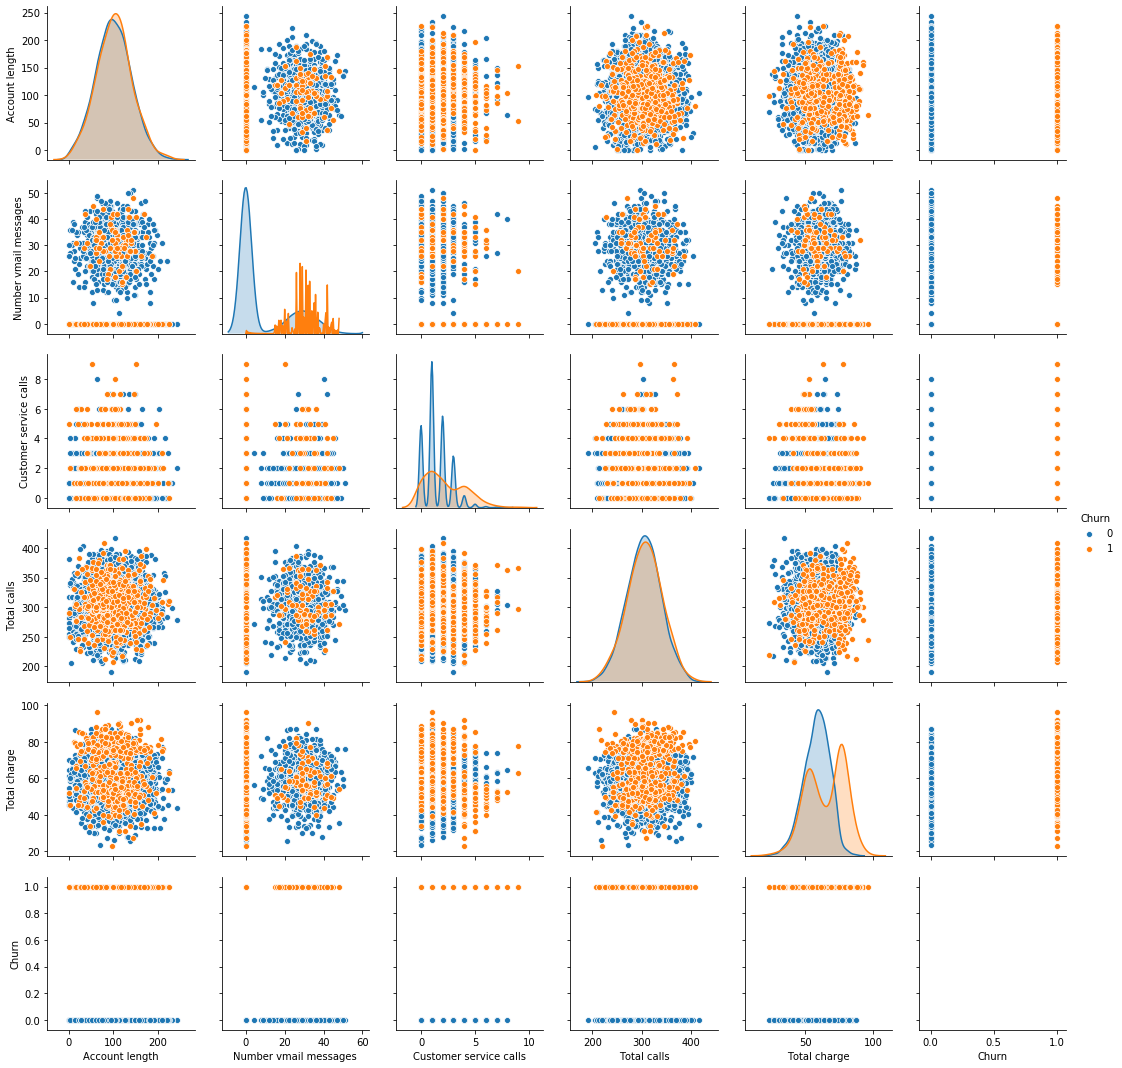

Wall time: 16.5 s


In [33]:
%%time
sns.pairplot(df[num_features + ['Churn']], hue='Churn',diag_kind='kde')
plt.show()

Уже видно, что по некоторым признакам данные хорошо разделяются. 

По диагональной оси грфика видно, что данные не равномерно распределены по целевым меткам. Это плохо для некоторых моделей. 

Для решения этой проблемы можно попробовать оверсэмплинг и андерсэмплинг. Для некоторых моделей можно указать коэффициент перед весами для меньшего класса, который будет равен просто разделив количество объектов большого класса на количество объектов меньшего класса. В некоторых моделях это можно сделать автоматически, добавив аргумент в функцию.

Из грфика выше видно, что есть какая то очень явная связь оттока и количества звонков в сервис. Посмотрим на данные в разрезе оттока и звонков в сервис:

In [34]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


Видим, что люди чаще уходят, если звонили в сервис 4 и более раз. Можно попробовать рассмативать этот признак как категориальный, и в последствии сравнить качество, полученное при обучении модели с разными типами этого признака. Поэтому добавим его и в список категориальных признаков и рассмотрим под другим углом.

In [35]:
cat_features.append('Customer service calls')

Перейдём к категориальным признакам. Посмотрим на количество уникальных категорий в каждом признаке.

In [36]:
num_cat = []
for f in cat_features:
    num_cat.append(len(df[f].value_counts()))
num_cat = pd.Series(num_cat, index=cat_features)
num_cat = num_cat.sort_values()
num_cat

International plan         2
Voice mail plan            2
Area code                  3
Customer service calls    10
State                     51
dtype: int64

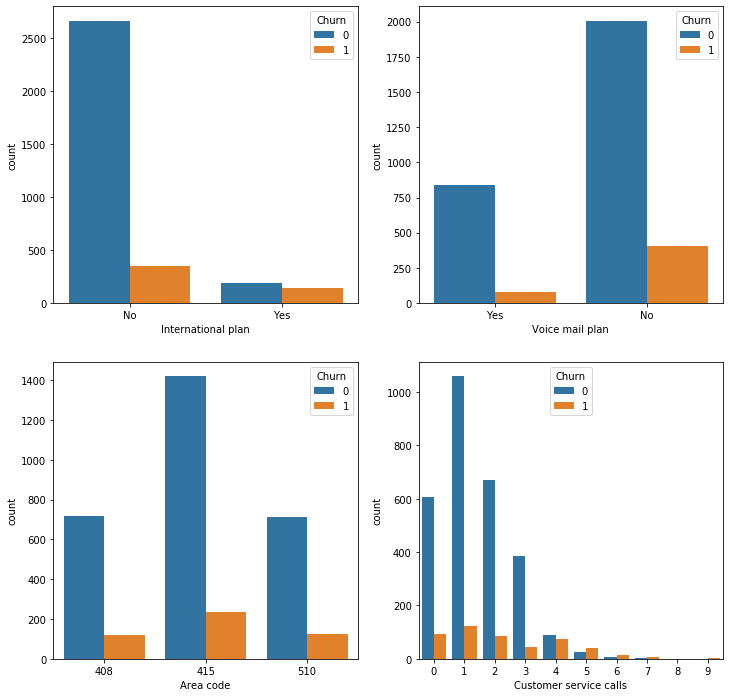

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for i, f in enumerate(num_cat.index[:4]):
    sns.countplot(x = f, data = df, hue = 'Churn', ax = axes[i // 2, i % 2])

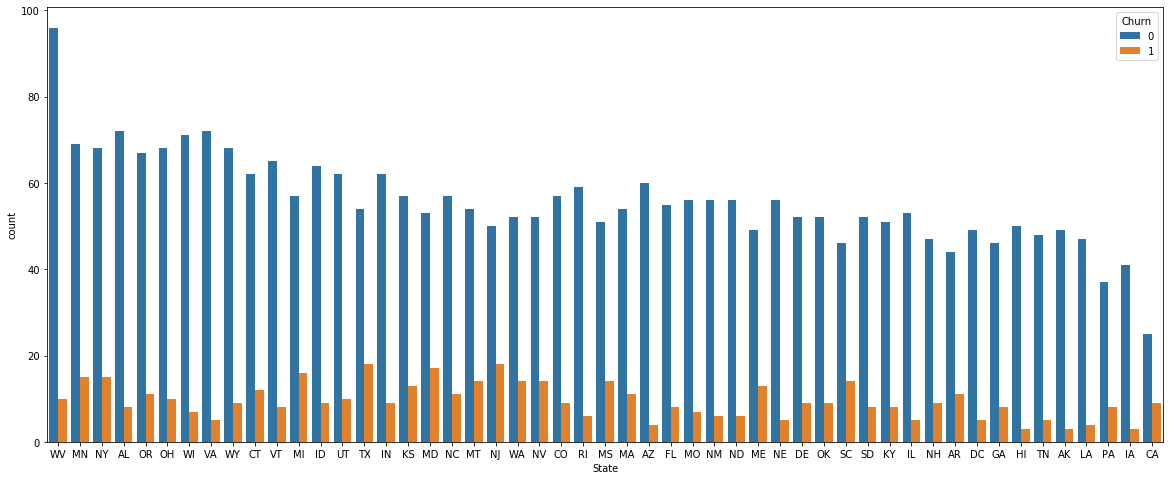

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(20, 8))
sns.countplot(x = 'State', data = df, hue = 'Churn', order=list(df['State'].value_counts().index))

Посмотрим на корреляции категориальных признаков между собой. Для бинарных признаков можно использовать корреляцию Мэтьюса, а для категориальных - коэффициент V Крамера. Однако коэффициент Крамера не сломается, если применять его к бинарным признакам, поэтому будем использовать только его.

Коэффициент Крмаера лежит в отрезке от 0 до 1, где 0 - полное отсутствие взаимосвязи, а 1 - полное совпадение, вплоть до переименования уровней.

In [39]:
# коэффициент корреляции Крамера для категориальных переменных
def cramers_corrected_stat(confusion_matrix):  # Функция взята из интернета, подробнее можно почитать на википедии. 
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


# обертка для функции выше
def get_cramers_cor(var1, var2):
    if var1 == var2:
        return 1.0
    confusion_matrix = pd.crosstab(df.loc[:, var1], df.loc[:, var2])
    return cramers_corrected_stat(confusion_matrix)

In [40]:
cat_with_churn = cat_features + ['Churn']

cor_matrix = pd.DataFrame(1.0, index=cat_with_churn, columns=cat_with_churn)
for feat in itertools.combinations(cat_with_churn, 2):
    cor_matrix.loc[feat[0], feat[1]] = get_cramers_cor(feat[0], feat[1])

In [41]:
for feat in itertools.combinations(cat_with_churn, 2):
    cor_matrix.loc[feat[1], feat[0]] = cor_matrix.loc[feat[0], feat[1]]

In [42]:
cor_matrix

,State,Area code,International plan,Voice mail plan,Customer service calls,Churn
State,1.000000,0.000000,0.064203,0.000000,0.000000,0.099562
Area code,0.000000,1.000000,0.042207,0.000000,0.022352,0.000000
International plan,0.064203,0.042207,1.000000,0.000000,0.043357,0.257869
Voice mail plan,0.000000,0.000000,0.000000,1.000000,0.017770,0.099717
Customer service calls,0.000000,0.022352,0.043357,0.017770,1.000000,0.316452
Churn,0.099562,0.000000,0.257869,0.099717,0.316452,1.000000


По получившейся таблице видно, что признаки почти не коррелируют между собой, а с целевой меткой более менее значимо коррелируют International plan и Customer service call. State и Voce mail plan имеют коэффициент корреляции с целевой меткой примерно 0.1. Исходя из этого, при построении модели можно будет попробовать удалять слабокоррелирующие признаки и смотреть на изменение качества. А в случае, если необходимо сделать быстро работающую модель, этими признаками стоит пожертвовать в первую очередь.

Также бросается в глаза, это то, что Area code выглядит бесполезным признаком

In [43]:
print('Доли объектов, принадлижащих каждой категории для всего набора данных')
print(df['Area code'].value_counts(normalize=True))
print()
print('Доли объектов, принадлижащих каждой категории при оттоке')
print(df.iloc[labels_churn_ind]['Area code'].value_counts(normalize=True))
print()
print('Доли объектов, принадлижащих каждой категории при НЕ оттоке')
print(df.iloc[labels_not_churn_ind]['Area code'].value_counts(normalize=True))

Доли объектов, принадлижащих каждой категории для всего набора данных
415    0.496550
510    0.252025
408    0.251425
Name: Area code, dtype: float64

Доли объектов, принадлижащих каждой категории при оттоке
415    0.488613
510    0.258799
408    0.252588
Name: Area code, dtype: float64

Доли объектов, принадлижащих каждой категории при НЕ оттоке
415    0.497895
408    0.251228
510    0.250877
Name: Area code, dtype: float64


Проверим гипотезу с помощью критерия хи квадрат. Этот критерий ещё можно интерпретировать как проверка значимости отличия от нуля коэффициента V Крамера.

H0: Отток клиента не зависит от признака Area code. (Коэффициент V Крамера = 0)

H1: H0 не верна

In [44]:
print(df.iloc[labels_churn_ind]['Area code'].value_counts())
print(df.iloc[labels_not_churn_ind]['Area code'].value_counts())

415    236
510    125
408    122
Name: Area code, dtype: int64
415    1419
408     716
510     715
Name: Area code, dtype: int64


In [45]:
kf_data = np.array([[236, 125, 122], [1419, 716, 715]])

In [46]:
kf = stats.chi2_contingency(kf_data)
print('p value =', kf[1])

p value = 0.918376310186538


Нулевая гипотеза не отвергается. Значение целевой метки не зависит от Area code

В дальнейшем можно попробовать другие методы отбора признаков. У некоторых моделей можно напрямую посмотреть значимость признаков для предсказания (например, в catboost метод get_feature_importance). Ещё можно будет попробовать различные жадные методы отбора признаков, методы понижения размерности. 